双下划线方法是类的特殊方法，方法名带有特殊意义的方法；尽量不要使用

以下方法只需要了解：

len方法

In [7]:
class A:
    def __len__(self):
        print(666)
        return 3 #必须返回非负整数
a = A()
print(len(a))   #!鸡贼，__len__偷偷修改了len的定义，使得这个类的对象不管长度为几，都是返回的3

class B:
    def __init__(self):
        self.a = 1
        self.b = 2
    def __len__(self):
        return len(self.__dict__)
b = B()
print(b.__dict__)  # !!!self.__dict__ 是一个字典，存着对象所有的属性 {'a': 1, 'b': 2}
print(len(b)) #使用这个办法可以将len与属性数量挂钩，后文调用的len（）等同于调用len（self.__dict__）
#小彩蛋！ 当__len__ return 0时为false，非0为true

666
3
{'a': 1, 'b': 2}
2


hash方法

In [10]:
class Person:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def __len__(self):
        print("trigger ...")
        return 2
p = Person("Alex",22)
len(p)

print(hash(p))

trigger ...
171123284420


In [9]:
class Person:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def __len__(self):
        print("trigger ...")
        return 2
    
    def __hash__(self):
        print("hash...")
        return 2222
p = Person("Alex",22)
len(p)

print(hash(p))

trigger ...
hash...
2222


eq方法

In [12]:
class Person:
    def __init__(self,name,age):
        self.name = name
        self.age = age
    def __len__(self):
        print("trigger ...")
        return 2
    def __hash__(self):
        print("hash...")
        return 2222
    
    def __eq__(self,other):
        print(self.name,other.name)
    
p = Person("Alex",22)
p2 = Person("Jack",22)
len(p)
print(p == p2)

trigger ...
Alex Jack
None


单例模式：1.这个类只有一个实例 2.所有对象储存在同一个地址

重写new方法的步骤非常固定
重写__new__方法一定要 return super().__new__(cls)，返回这个对象的引用给初始化函数__init__
注意__new__是一个静态的方法，需要主动传递cls参数
__new__比__init__更早被调用

In [2]:
class MusicPlayer(object):
    def __new__(cls,*args,**kwargs):
        print("创建对象，分配空间") #只执行__new__没有执行初始化
    
    def __init__(self): #没有返回对象的引用给初始化所以无法完成
        print("播放器初始化")
player = MusicPlayer()
print(player) #输出了None 表示创建的对象为空

创建对象，分配空间
None


*args（一颗星）：把散装的参数，打包成 元组 (Tuple)。
**kwargs（两颗星）：把带键值的参数，打包成 字典 (Dict)。
合体使用：def func(*args, **kwargs) = 我全都要，无论你传什么我都接得住。

In [6]:
#完整办法
class MusicPlayer(object):
    def __new__(cls,*args,**kwargs):
        print("创建对象，分配空间") #只执行__new__没有执行初始化
        return super().__new__(cls)
    
    def __init__(self): #没有返回对象的引用给初始化所以无法完成
        print("播放器初始化")
        
player = MusicPlayer()
print(player) #输出了None 表示创建的对象为空
player2 = MusicPlayer()
print(player2)#两个对象的储存位置不同，还是不是单例模式

创建对象，分配空间
播放器初始化
创建对象，分配空间
播放器初始化


In [14]:
#单例模式的代码实现
class MusicPlayer(object):
    instance = None #记录第一个被创建的对象的引用
    
    def __new__(cls,*args,**kwargs):
        if cls.instance is None:
            cls.instance = super().__new__(cls) #将类属性的地址指定分配
        return cls.instance
    
    def __init__(self): #没有返回对象的引用给初始化所以无法完成
        print("播放器初始化")
player = MusicPlayer()
print(player) 
player2 = MusicPlayer()
print(player2) #两个对象的返回值一样，成功创建单例模式

播放器初始化
播放器初始化


In [12]:
#修改代码，使__init__只执行一次
class MusicPlayer(object):
    instance = None #记录第一个被创建的对象的引用
    
    init_flag = False
    def __new__(cls,*args,**kwargs):
        if cls.instance is None:
            cls.instance = super().__new__(cls) #将类属性的地址指定分配
        return cls.instance
    
    def __init__(self):
        if MusicPlayer.init_flag:
            return
        print("播放器初始化")
        MusicPlayer.init_flag = True

player = MusicPlayer()
print(player) 
player2 = MusicPlayer()
print(player2) #两个对象的返回值一样，成功创建单例模式

播放器初始化


在我的游戏中使用单例模式统一管理全局数据

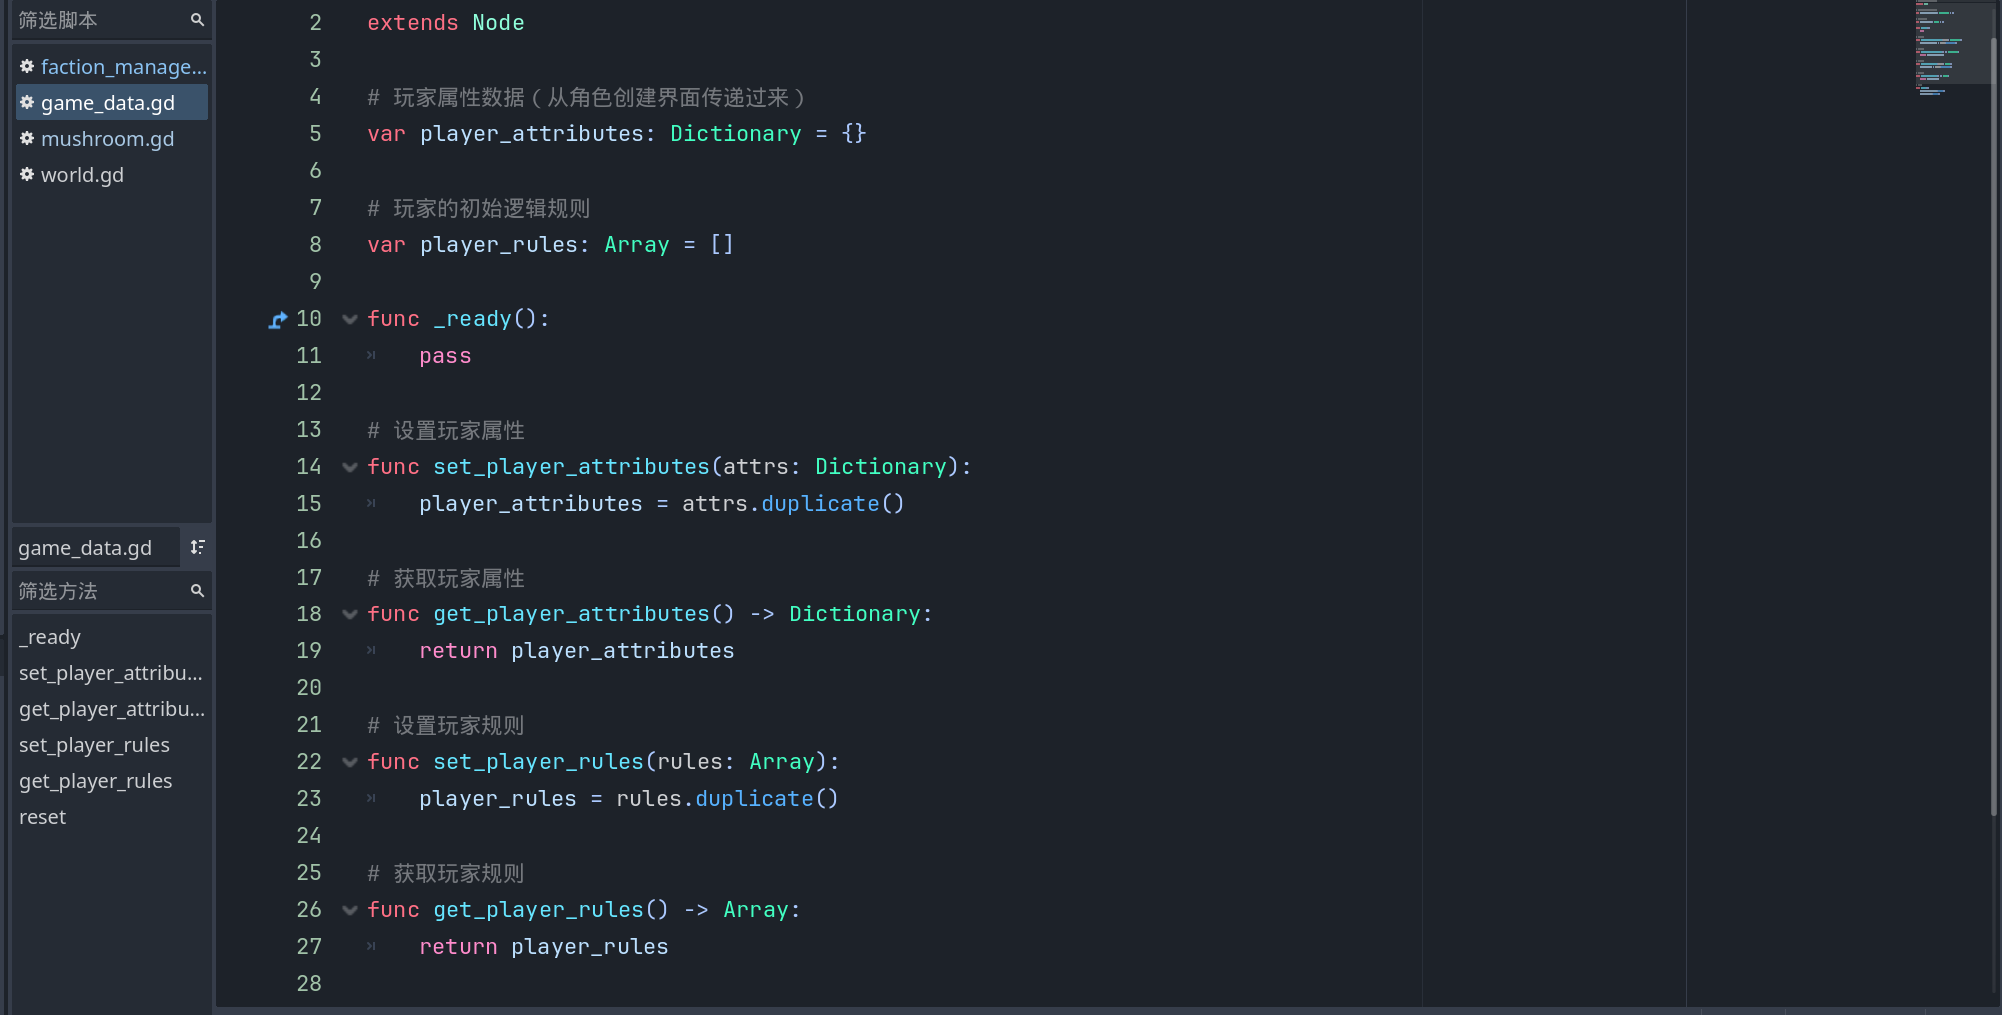